<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Time_series/Time_series_all_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

## Alpha vantage

In [ ]:
!pip install alpha_vantage

In [ ]:
api_key = 'VHR4VD5LDC1NL12S'

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-09-03 20:00:00   213.75   213.98  213.50    213.98     1784.0
2020-09-03 19:59:00   213.43   213.56  213.43    213.56     2984.0
2020-09-03 19:58:00   213.34   213.45  213.32    213.32     3764.0
2020-09-03 19:57:00   213.50   213.50  213.40    213.48     2108.0
2020-09-03 19:56:00   213.80   213.80  213.50    213.50     5499.0
...                      ...      ...     ...       ...        ...
2020-08-21 04:32:00   213.64   213.64  213.56    213.56      562.0
2020-08-21 04:22:00   214.00   214.00  214.00    214.00      321.0
2020-08-21 04:07:00   214.19   214.19  214.19    214.19      100.0
2020-08-21 04:04:00   214.16   214.16  214.16    214.16      142.0
2020-08-21 04:01:00   214.07   214.07  214.00    214.00     1191.0

[7052 rows x 5 columns]


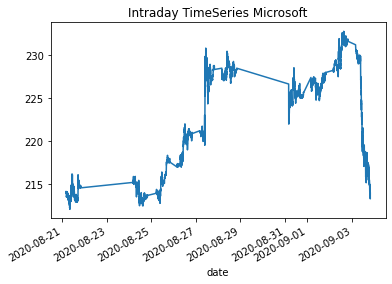

In [ ]:
#1. Time Series Intraday
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(data)

data['4. close'].plot()
plt.title('Intraday TimeSeries Microsoft')
plt.show()

                          SMA
date                         
2020-08-21 07:37:00  213.6147
2020-08-21 07:39:00  213.5978
2020-08-21 07:40:00  213.5778
2020-08-21 07:41:00  213.5580
2020-08-21 07:42:00  213.5413
...                       ...
2020-09-03 19:56:00  214.5200
2020-09-03 19:57:00  214.4947
2020-09-03 19:58:00  214.4650
2020-09-03 19:59:00  214.4322
2020-09-03 20:00:00  214.4068

[6993 rows x 1 columns]
date
2020-08-21 07:37:00    215.18
2020-08-21 07:39:00    215.50
2020-08-21 07:40:00    215.53
2020-08-21 07:41:00    215.10
2020-08-21 07:42:00    215.00
                        ...  
2020-09-03 19:56:00    213.56
2020-09-03 19:57:00    214.00
2020-09-03 19:58:00    214.19
2020-09-03 19:59:00    214.16
2020-09-03 20:00:00    214.00
Name: 4. close, Length: 6993, dtype: float64
                          SMA  4. close
date                                   
2020-08-21 07:37:00  213.6147    215.18
2020-08-21 07:39:00  213.5978    215.50
2020-08-21 07:40:00  213.5778    215.53
2020-

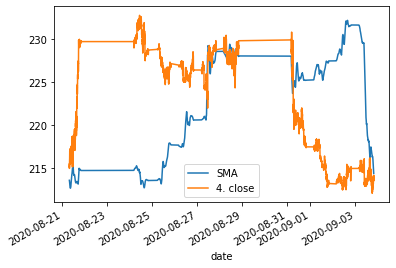

In [ ]:
#2. Simple Moving Average VS. Intraday Time Series


import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

periods = 60

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', interval='1min', 
                         time_period=60, series_type='close')


df1 = data_ti
df2 = data_ts['4. close'].iloc[periods-1::]

print(df1)
df2.index = df1.index
print(df2)

total_df = pd.concat([df1,df2], axis=1)
print(total_df)

total_df.plot()
plt.show()

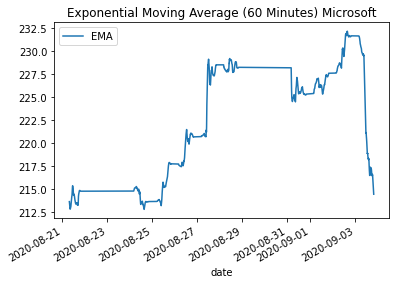

In [ ]:
# 3. Exponential Moving Average

import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_ema(symbol='MSFT', interval='1min', 
                         time_period=60, series_type='close')

data.plot()
plt.title('Exponential Moving Average (60 Minutes) Microsoft')
plt.show()

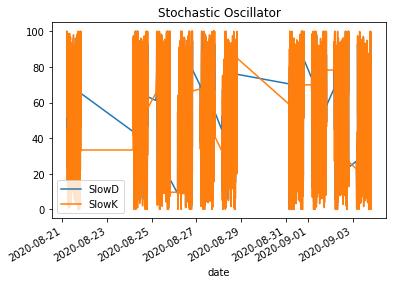

In [ ]:
# 4. Stoichastic Oscillator
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_stoch(symbol='MSFT', interval='1min')

data.plot()
plt.title('Stochastic Oscillator')
plt.show()

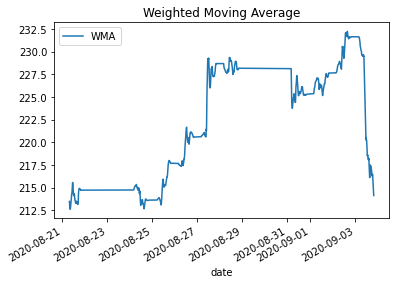

In [ ]:
#5. Weighted Moving Average
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_wma(symbol='MSFT', interval='1min', time_period=60, series_type='close')

data.plot()
plt.title('Weighted Moving Average')
plt.show()

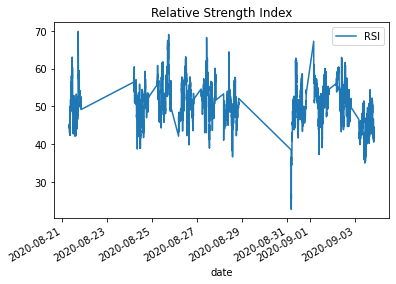

In [ ]:
#6. Relative Strength Index

import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_rsi(symbol='MSFT', interval='1min', time_period=60, series_type='close')

data.plot()
plt.title('Relative Strength Index')
plt.show()

                         RSI
date                        
2020-08-21 05:20:00  52.5000
2020-08-21 05:22:00  46.7146
2020-08-21 05:25:00  46.7146
2020-08-21 05:28:00  50.8142
2020-08-21 05:29:00  49.9859
...                      ...
2020-09-03 19:56:00  35.6555
2020-09-03 19:57:00  35.2984
2020-09-03 19:58:00  32.4947
2020-09-03 19:59:00  40.1711
2020-09-03 20:00:00  50.7300

[7038 rows x 1 columns]
date
2020-09-03 19:46:00    213.96
2020-09-03 19:45:00    214.00
2020-09-03 19:44:00    214.02
2020-09-03 19:43:00    214.34
2020-09-03 19:42:00    214.50
                        ...  
2020-08-21 04:32:00    213.56
2020-08-21 04:22:00    214.00
2020-08-21 04:07:00    214.19
2020-08-21 04:04:00    214.16
2020-08-21 04:01:00    214.00
Name: 4. close, Length: 7038, dtype: float64


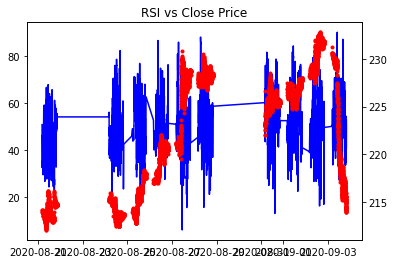

In [ ]:
#7. RSI vs Close prices

import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

periods = 14

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='MSFT', interval='1min',
                         time_period=periods, series_type='close')


df1 = data_ti
df2 = data_ts['4. close'].iloc[periods::]

print(df1)
df1.index = df2.index
print(df2)

fig, ax1 = plt.subplots()
ax1.plot(df1, 'b-')
ax2 = ax1.twinx()
ax2.plot(df2, 'r.')
plt.title('RSI vs Close Price')
plt.show()

## Yahoo

In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=5e8c4eabfa330a16906e51ee9390a1222d469efd43c6b417ae8c7cd5a4c3fe59
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import pandas as pd 
import numpy as np
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

df_twtr = yf.download('AAPL', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df_twtr

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,41.007496,41.523222,40.790599,41.513580,102223600
2018-01-03,41.578643,42.065451,41.441278,41.506344,118071600
2018-01-04,41.581050,41.805176,41.470195,41.699139,89738400
2018-01-05,41.797943,42.263059,41.703956,42.173893,94640000
2018-01-08,42.017254,42.320905,41.916033,42.017254,82271200
...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,200119000


## Pandas datareader

### yahoo OK

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
#tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2020-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('AAPL', 'yahoo', start_date,
                             #end_date
                             )
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
...,...,...,...,...,...,...
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993
2020-09-01,134.800003,130.529999,132.759995,134.179993,152470100.0,134.179993
2020-09-02,137.979996,127.000000,137.589996,131.399994,200119000.0,131.399994


### tiingo OK

In [ ]:
import pandas_datareader as pdr
df = pdr.get_data_tiingo('MSFT', start='2019-01-01', 
                         #end='2020-05-30', 
                         api_key='47eea91d37bcf30b4e1e3ef0365846e8041b4aa8')
df

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
MSFT   2019-01-02 00:00:00+00:00  101.12  101.7500  ...      0.0          1.0
       2019-01-03 00:00:00+00:00   97.40  100.1900  ...      0.0          1.0
       2019-01-04 00:00:00+00:00  101.93  102.5100  ...      0.0          1.0
       2019-01-07 00:00:00+00:00  102.06  103.2700  ...      0.0          1.0
       2019-01-08 00:00:00+00:00  102.80  103.9700  ...      0.0          1.0
...                                  ...       ...  ...      ...          ...
       2020-08-31 00:00:00+00:00  225.53  228.7000  ...      0.0          1.0
       2020-09-01 00:00:00+00:00  227.27  227.4500  ...      0.0          1.0
       2020-09-02 00:00:00+00:00  231.65  232.8600  ...      0.0          1.0
       2020-09-03 00:00:00+00:00  217.30  229.3100  ...      0.0          1.0
       2020-09-04 00:00:00+00:00  214.25  218.3599  ...      0.0          1.0

[424 rows x 12 columns]

### Alpha Vantage OK

In [ ]:
#Alpha Vantage
import os
from datetime import datetime
import pandas_datareader.data as web
f = web.DataReader("AAPL", "av-daily", start=datetime(2019, 2, 9),
                   #end=datetime(2017, 5, 24),
                   api_key='VHR4VD5LDC1NL12S')
f

,open,high,low,close,volume
2017-02-09,131.65,132.445,131.12,132.42,28349859
2017-02-10,132.46,132.940,132.05,132.12,20065458
2017-02-13,133.08,133.820,132.75,133.29,23035421
2017-02-14,133.47,135.090,133.25,135.02,33226223
2017-02-15,135.52,136.270,134.62,135.51,35623100
...,...,...,...,...,...
2020-08-31,127.58,131.000,126.00,129.04,223505733
2020-09-01,132.76,134.800,130.53,134.18,152470142
2020-09-02,137.59,137.980,127.00,131.40,200118991
2020-09-03,126.91,128.840,120.50,120.88,257599640


In [ ]:
import pandas_datareader.data as web
f = web.DataReader("USD/JPY", "av-forex",api_key='VHR4VD5LDC1NL12S')
f

,USD/JPY
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,JPY
To_Currency Name,Japanese Yen
Exchange Rate,106.23200000
Last Refreshed,2020-09-05 02:57:05
Time Zone,UTC
Bid Price,106.23049682
Ask Price,106.23402903


In [ ]:
f = web.DataReader(["USD/JPY", "BTC/CNY"], "av-forex",api_key='VHR4VD5LDC1NL12S')
f

,USD/JPY,BTC/CNY
From_Currency Code,USD,BTC
From_Currency Name,United States Dollar,Bitcoin
To_Currency Code,JPY,CNY
To_Currency Name,Japanese Yen,Chinese Yuan
Exchange Rate,106.23200000,71370.19871600
Last Refreshed,2020-09-05 02:57:05,2020-09-05 02:57:07
Time Zone,UTC,UTC
Bid Price,106.23049682,71370.19871600
Ask Price,106.23402903,71370.26714400


In [ ]:
#Alpha Vantage 
#Sector Performance
import pandas_datareader.data as web
web.get_sector_performance_av(api_key='VHR4VD5LDC1NL12S').head()

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Financials,0.77%,0.77%,-0.36%,4.85%,2.16%,-18.03%,-4.88%,2.19%,35.15%,114.77%
Industrials,0.21%,0.21%,-1.25%,7.81%,9.07%,-4.62%,4.56%,12.51%,49.46%,152.26%
Materials,0.13%,0.13%,0.79%,7.29%,11.04%,4.92%,15.29%,16.72%,50.84%,104.48%
Consumer Staples,-0.24%,-0.24%,-0.47%,4.70%,9.55%,3.63%,7.38%,18.85%,38.65%,138.27%
Energy,-0.33%,-0.33%,-4.46%,-4.58%,-17.00%,-42.97%,-37.98%,-44.06%,-44.89%,-35.79%


### IEX

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2019, 9, 1)
end = datetime(2018, 9, 1)
f = web.DataReader('F', 'iex', start, 
                   #end,
                   api_key='pk_43b75da6f5ca44d98ae749dbba17ce7a'
                   )
f

,open,high,low,close,volume
date,,,,,
2019-09-03,9.18,9.20,9.04,9.10,26331720
2019-09-04,9.17,9.23,9.07,9.20,27410227
2019-09-05,9.25,9.40,9.25,9.34,36640467
2019-09-06,9.37,9.41,9.20,9.34,29210272
2019-09-09,9.39,9.65,9.39,9.54,48059365
...,...,...,...,...,...
2020-08-28,6.93,6.95,6.86,6.94,39936920
2020-08-31,6.90,6.93,6.79,6.82,50089521
2020-09-01,6.77,6.87,6.72,6.83,48214176


### Econdb

Econdb provides economic data from 90+ official statistical agencies. Free API allows access to the complete Econdb database of time series aggregated into datasets.

In [ ]:
import pandas_datareader.data as web
f = web.DataReader('ticker=RGDPUS', 'econdb')
f

TableName,T10106
SeriesCode,A191RX
Table,"Table 1.1.6. Real Gross Domestic Product, Chained Dollars (A) (Q)"
Series description,Gross domestic product
CL_UNIT,Level
CL_FREQ,Q
TIME_PERIOD,
2015-10-01,17514062
2016-01-01,17613264
2016-04-01,17668204
2016-07-01,17764388


### Enigma

Access datasets from Enigma, the world’s largest repository of structured public data. Note that the Enigma URL has changed from app.enigma.io as of release 0.6.0, as the old API deprecated.

Datasets are unique identified by the uuid4 at the end of a dataset’s web address. For example, the following code downloads from USDA Food Recalls 1996 Data.

In [ ]:
import pandas_datareader as pdr
df = pdr.get_data_enigma('292129b0-1275-44c8-a6a3-2a0881f24fe1',
                         )
df

JSONDecodeError: ignored

### Quandl

Daily financial data (prices of stocks, ETFs etc.) from Quandl. The symbol names consist of two parts: DB name and symbol name. DB names can be all the free ones listed on the Quandl website. Symbol names vary with DB name; for WIKI (US stocks), they are the common ticker symbols, in some other cases (such as FSE) they can be a bit strange. Some sources are also mapped to suitable ISO country codes in the dot suffix style shown above, currently available for BE, CN, DE, FR, IN, JP, NL, PT, UK, US.

As of June 2017, each DB has a different data schema, the coverage in terms of time range is sometimes surprisingly small, and the data quality is not always good.

In [ ]:
import pandas_datareader.data as web
symbol = 'AAPL.US' 
start_date = '2016-01-01'
end_date = '2016-12-31'
df = web.DataReader(symbol, 'quandl', start_date, 
                    #end_date,
                    api_key='yz7qGzikAuQL9wn7rrX-')
df

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.150,166.92,168.340,38962839.0,0.0,1.0,173.680000,175.150000,166.920000,168.340000,38962839.0
2018-03-26,168.07,173.100,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0
2018-03-23,168.39,169.920,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
2018-03-22,170.00,172.680,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-21,175.04,175.090,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,98.55,99.110,96.76,96.960,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
2016-01-07,98.68,100.130,96.43,96.450,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-06,100.56,102.370,99.87,100.700,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


### FRED

In [ ]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2013, 1, 27)
gdp = web.DataReader('GDP', 'fred', start, 
                     #end
                     )
gdp

,GDP
DATE,
2015-01-01,18003.399
2015-04-01,18223.577
2015-07-01,18347.425
2015-10-01,18378.803
2016-01-01,18470.156
2016-04-01,18656.207
2016-07-01,18821.359
2016-10-01,19032.580
2017-01-01,19237.435


In [ ]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, 
                           #end
                           )
inflation

,CPIAUCSL,CPILFESL
DATE,,
2015-01-01,234.747,239.811
2015-02-01,235.342,240.172
2015-03-01,235.976,240.755
2015-04-01,236.222,241.346
2015-05-01,237.001,241.688
...,...,...
2020-03-01,257.953,266.795
2020-04-01,255.902,265.601
2020-05-01,255.768,265.441


### World Bank


pandas users can easily access thousands of panel data series from the World Bank’s World Development Indicators by using the wb I/O functions.

Indicators
Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if you wanted to compare the Gross Domestic Products per capita in constant dollars in North America, you would use the search function:

In [ ]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [ ]:
 dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2015, end=2020)
 dat

NY.GDP.PCAP.KD
country       year                
Canada        2019    51588.761444
              2018    51476.200779
              2017    51170.475834
              2016    50193.750417
              2015    50262.027666
Mexico        2019    10275.634039
              2018    10403.540397
              2017    10301.357885
              2016    10205.795753
              2015    10037.201490
United States 2019    55670.235709
              2018    54659.198268
              2017    53382.764823
              2016    52555.518032
              2015    52116.738813

In [ ]:
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Canada           50938.243228
Mexico           10244.705913
United States    53676.891129
Name: NY.GDP.PCAP.KD, dtype: float64

Now imagine you want to compare GDP to the share of people with cellphone contracts around the world.

In [ ]:
wb.search('cell.*%').iloc[:,:2]

,id,name
7566,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%)
7621,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...


# EDA stock data

## Cufflink

In [ ]:
import pandas as pd 
import yfinance as yf

df_twtr = yf.download('TWTR', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df_twtr

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,24.070000,24.570000,23.850000,24.510000,15297200
2018-01-03,24.559999,24.680000,24.070000,24.450001,12832600
2018-01-04,24.500000,24.590000,23.690001,23.990000,17653500
2018-01-05,24.070000,24.570000,23.879999,24.320000,14953200
2018-01-08,24.370001,24.780001,23.879999,24.590000,17831300
...,...,...,...,...,...
2020-08-31,40.990002,41.070000,40.570000,40.580002,7468300
2020-09-01,40.610001,41.250000,40.139999,41.150002,10478800
2020-09-02,41.520000,44.090000,41.360001,43.669998,26800000


In [ ]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [ ]:
qf = cf.QuantFig(df_twtr, title="Twitter's Stock Price", 
                 legend='top', name='TWTR')
qf.add_volume()
qf.add_sma(periods=20, column='Close', color='red')
qf.add_ema(periods=20, color='green') 
qf.iplot(asFigure=True)

In [ ]:
import cufflinks as cf
df = yf.download('AAPL', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,41.007496,41.523222,40.790599,41.513580,102223600
2018-01-03,41.578643,42.065451,41.441278,41.506344,118071600
2018-01-04,41.581050,41.805176,41.470195,41.699139,89738400
2018-01-05,41.797943,42.263059,41.703956,42.173893,94640000
2018-01-08,42.017254,42.320905,41.916033,42.017254,82271200
...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,200119000


In [ ]:
qf=cf.QuantFig(df,title='First Quant Figure',legend='top',name='Apple')
qf.add_bollinger_bands()
qf.iplot(asFigure=True)

In [ ]:
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_volume()
qf.add_macd()
qf.iplot(asFigure=True)

# ML for finace (alone)

## Data prepare

Method 1: yfinance

In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=79c8104ac00d5ab575d64db0fef8f5f19cf63cc824cf82d4532372bd4476a483
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import pandas as pd 
import numpy as np
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

df = yf.download('AAPL', 
                       start='2018-01-01', 
                       end='2020-09-05',
                      )
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000


Method 2: yahoo_fin.stock_info

In [ ]:
!pip install yahoo_fin
!pip install requests_html

In [ ]:
stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

In [ ]:
stock_code['SP500']

'^GSPC'

In [ ]:
from yahoo_fin.stock_info import get_data

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
df

,open,high,low,close,adjclose,volume,ticker
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,^GSPC
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,^GSPC
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,^GSPC
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,^GSPC
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,^GSPC
...,...,...,...,...,...,...,...
2020-08-31,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000,^GSPC
2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000,^GSPC
2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000,^GSPC
2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000,^GSPC


In [ ]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

qf = cf.QuantFig(df, title="Twitter's Stock Price", 
                 legend='top', name='TWTR')
qf.add_volume()
qf.add_sma(periods=20, column='adjclose', color='red')
qf.add_ema(periods=20, color='green') 
qf.iplot(asFigure=True)

## Time series with Sktime

In [ ]:
!pip install sktime

In [ ]:
import numpy as np
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,^GSPC
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,^GSPC
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,^GSPC
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,^GSPC
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,^GSPC


In [ ]:
data=df['adjclose']
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
type(data)

pandas.core.series.Series

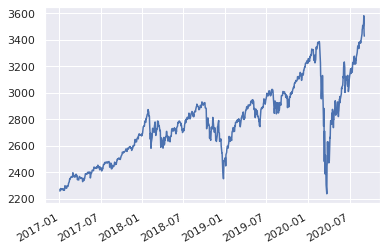

In [ ]:
data.plot()

In [ ]:
data=data.reset_index(drop=True)
data

0      2257.830078
1      2270.750000
2      2269.000000
3      2276.979980
4      2268.899902
          ...     
921    3500.310059
922    3526.649902
923    3580.840088
924    3455.060059
925    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
y_train, y_test = temporal_train_test_split(data)

In [ ]:
y_train

0      2257.830078
1      2270.750000
2      2269.000000
3      2276.979980
4      2268.899902
          ...     
689    2976.739990
690    2940.250000
691    2887.610107
692    2910.629883
693    2952.010010
Name: adjclose, Length: 694, dtype: float64

In [ ]:
y_test #25% data

694    2938.790039
695    2893.060059
696    2919.399902
697    2938.129883
698    2970.270020
          ...     
921    3500.310059
922    3526.649902
923    3580.840088
924    3455.060059
925    3426.959961
Name: adjclose, Length: 232, dtype: float64

In [ ]:
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
print(len(fh))
fh

232


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

0.07825903524510416

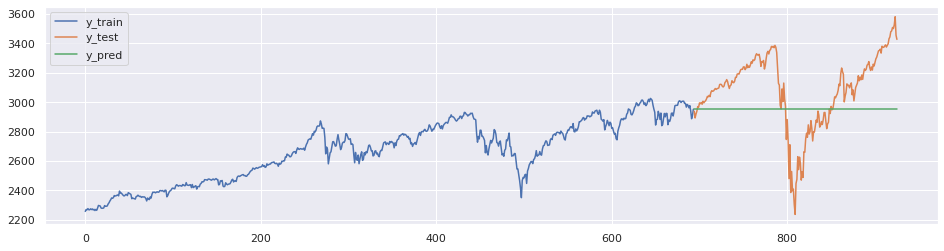

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/naive.py:80: UserWarning:

For the `last` and `mean` strategy, the `sp` value will be ignored.



0.07825903524510416

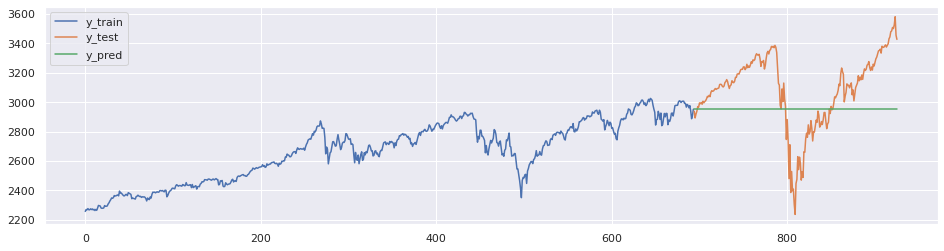

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

0.08142599409712281

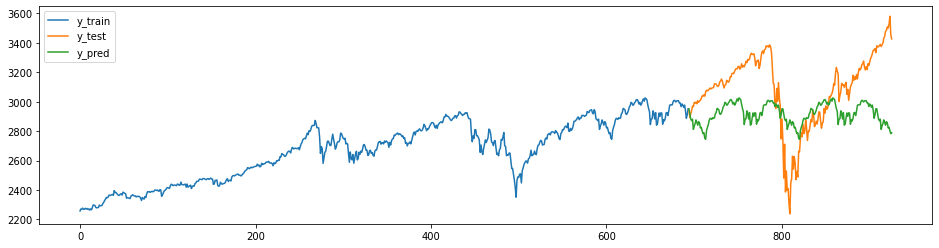

In [ ]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, 
                                         strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/exp_smoothing.py:99: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1136: FutureWarning:

use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.



0.06699609282454391

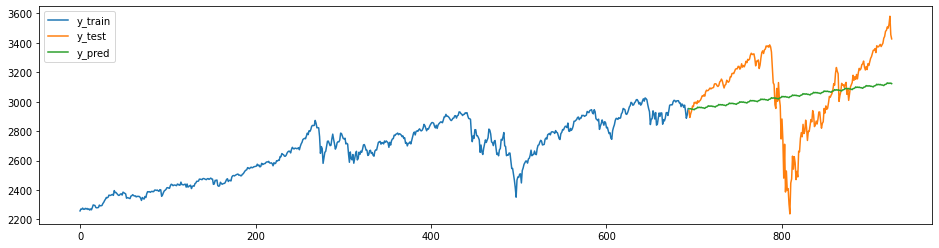

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/exp_smoothing.py:99: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1136: FutureWarning:

use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.



0.07436641484059946

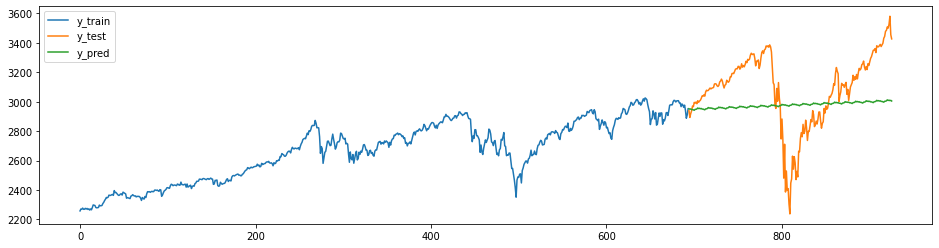

In [ ]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [ ]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.model_selection import SlidingWindowSplitter

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.08171117367206468

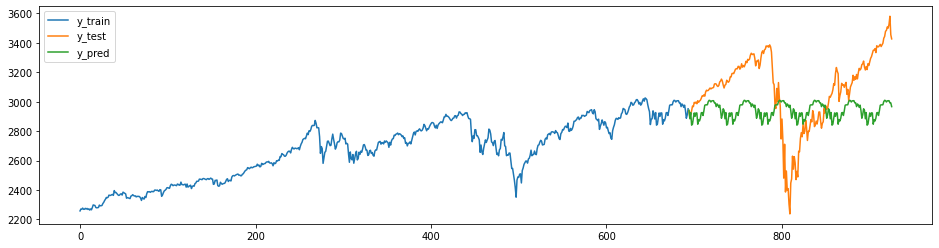

In [ ]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.06629073429327502

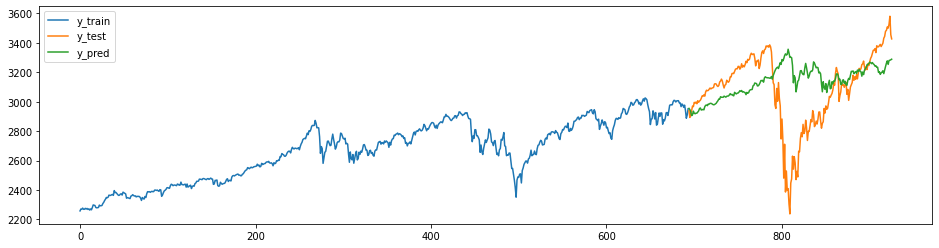

In [ ]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/exp_smoothing.py:99: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1136: FutureWarning:

use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.



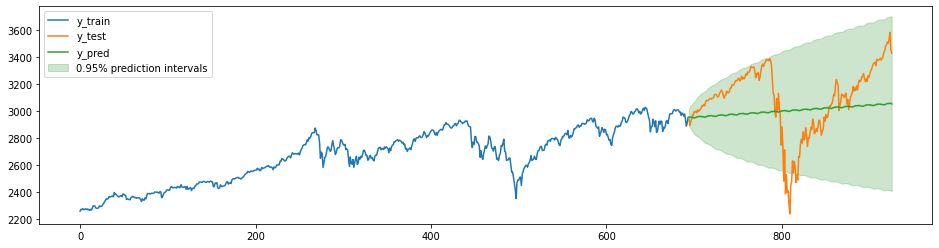

In [ ]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();

0.0789400811402983

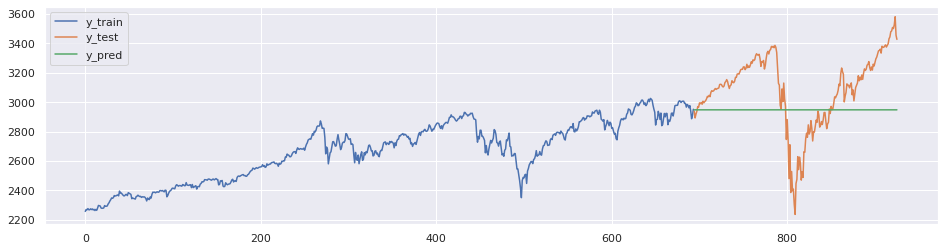

In [ ]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.0789400811402983

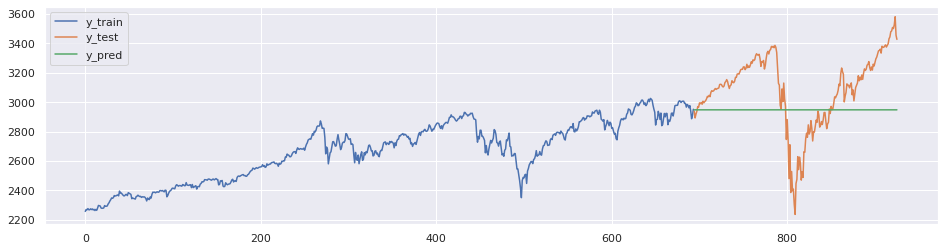

In [ ]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

### Dynamic forecasts (best)

For model evaluation, we sometimes want to evaluate multiple forecasts, using temporal cross-validation with a sliding window over the test data. For this purpose, all forecasters in sktime have a update_predict method. Here we make repeated single-step ahead forecasts over the test set.

Note that the forecasting task is changed: while we still make 36 predictions, we do not predict 36 steps ahead, but instead make 36 single-step-ahead predictions.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.model_selection import SlidingWindowSplitter
%matplotlib inline

In [ ]:
df

,open,high,low,close,adjclose,volume,ticker
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,^GSPC
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,^GSPC
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,^GSPC
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,^GSPC
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,^GSPC
...,...,...,...,...,...,...,...
2020-08-31,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000,^GSPC
2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000,^GSPC
2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000,^GSPC
2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000,^GSPC


In [ ]:
data=df['adjclose']
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
newdata=data.reset_index(drop=True)
newdata

0      2257.830078
1      2270.750000
2      2269.000000
3      2276.979980
4      2268.899902
          ...     
921    3500.310059
922    3526.649902
923    3580.840088
924    3455.060059
925    3426.959961
Name: adjclose, Length: 926, dtype: float64

740 186


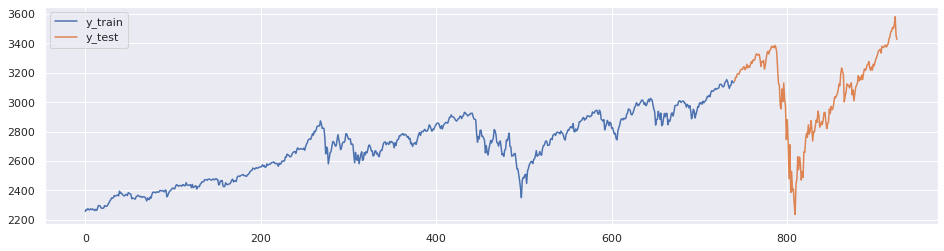

In [ ]:
y_train, y_test = temporal_train_test_split(newdata, test_size=0.2)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

0.014858728462814287

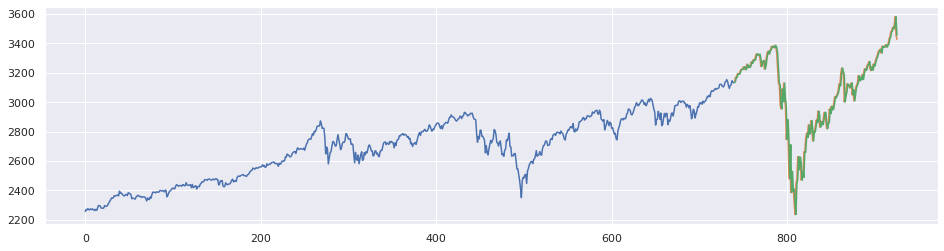

In [ ]:
#y_train, y_test = temporal_train_test_split(newdata, test_size=0.2)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
plot_ys(y_train, y_test, y_pred);
smape_loss(y_test, y_pred)

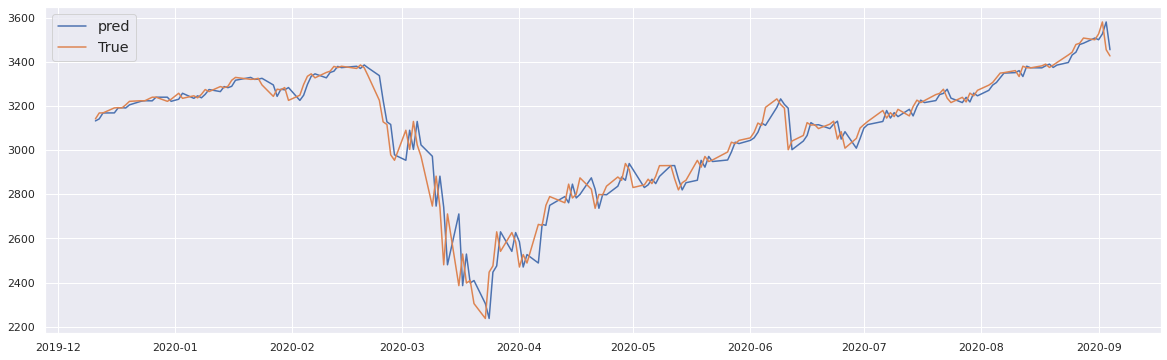

In [ ]:
y_pred.index=data[len(y_train):].index
y_test.index=data[len(y_train):].index
plt.figure(figsize=(20,6))
plt.plot(y_pred,label='pred')
plt.plot(y_test,label='True')
plt.legend(fontsize='x-large')
plt.show()

In [ ]:
final_df=pd.concat([y_test, y_pred], axis=1)
final_df.columns=['close','close_pred']
final_df

,close,close_pred
2019-12-11,3141.629883,3132.520020
2019-12-12,3168.570068,3141.629883
2019-12-13,3168.800049,3168.570068
2019-12-16,3191.449951,3168.800049
2019-12-17,3192.520020,3191.449951
...,...,...
2020-08-31,3500.310059,3508.010010
2020-09-01,3526.649902,3500.310059
2020-09-02,3580.840088,3526.649902
2020-09-03,3455.060059,3580.840088


In [ ]:
# daily returns
daily_rtn=[]
for i in range(len(final_df)-1):
  revenue = final_df['close'][i] - final_df['close_pred'][i+1]
  daily_rtn.append(revenue)
#daily_rtn

0.07078912679054251

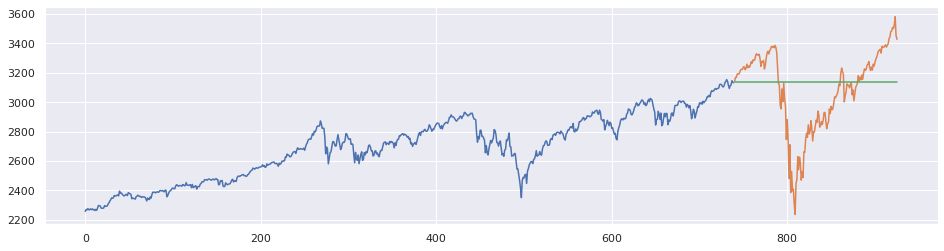

In [ ]:
#y_train, y_test = temporal_train_test_split(newdata, test_size=0.2)
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
plot_ys(y_train, y_test, y_pred);
smape_loss(y_test, y_pred)

0.03898852910001241

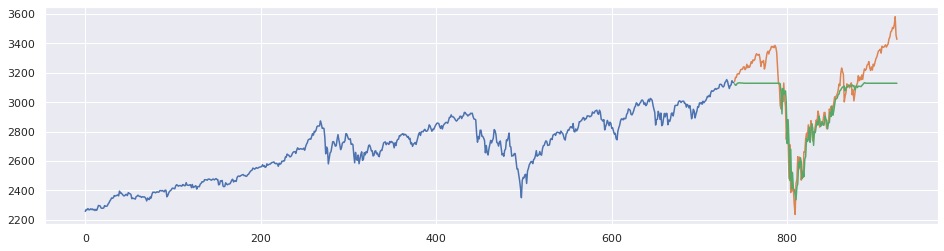

In [ ]:
import numpy as np
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

regressor = RandomForestRegressor()
forecaster = ReducedRegressionForecaster(regressor)
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
plot_ys(y_train, y_test, y_pred);
smape_loss(y_test, y_pred)

## ARIMA

In [ ]:
# evaluate the finalized model on the validation dataset
import warnings
import itertools
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import Grouper
from pandas import Series
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']
data

### Manual Arima

In [ ]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Original data')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -1.8237
p-value                          0.3688
Lags Used                        9.0000
Number of Observations Used    916.0000
Critical Value (1%)             -3.4375
Critical Value (5%)             -2.8647
Critical Value (10%)            -2.5685
dtype: float64

The Test Statistics is higher than the Critical Value of 5%.
The serie isn't stationary


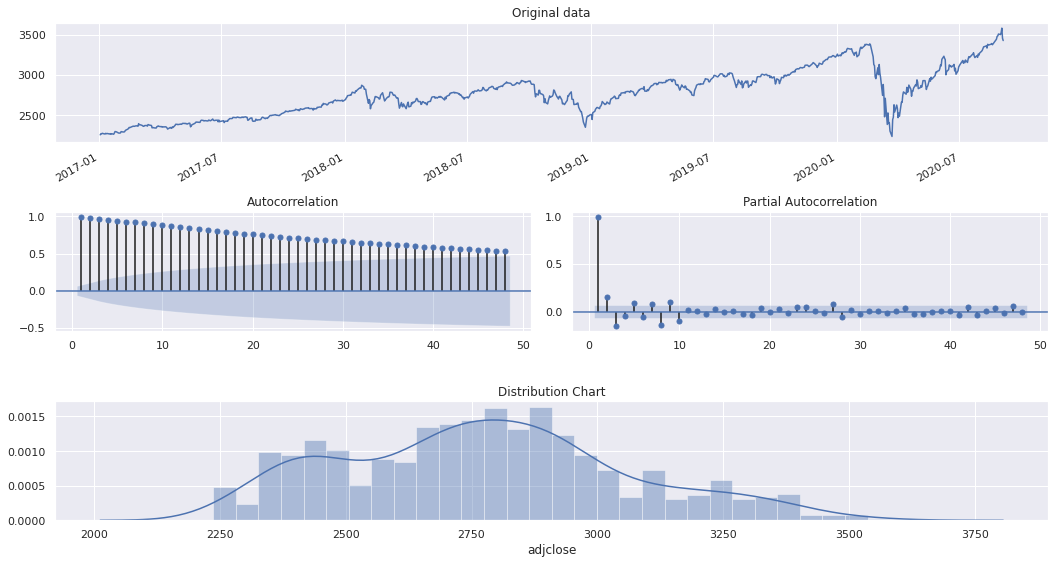

In [ ]:
# The first approach is to check the series without any transformation
check_stationarity(data)

In [ ]:
data.diff(1) # ngay hom sau tru di ngay hom truoc

2017-01-03           NaN
2017-01-04     12.919922
2017-01-05     -1.750000
2017-01-06      7.979980
2017-01-09     -8.080078
                 ...    
2020-08-31     -7.699951
2020-09-01     26.339844
2020-09-02     54.190186
2020-09-03   -125.780029
2020-09-04    -28.100098
Name: adjclose, Length: 926, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -8.7089
p-value                          0.0000
Lags Used                        8.0000
Number of Observations Used    916.0000
Critical Value (1%)             -3.4375
Critical Value (5%)             -2.8647
Critical Value (10%)            -2.5685
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


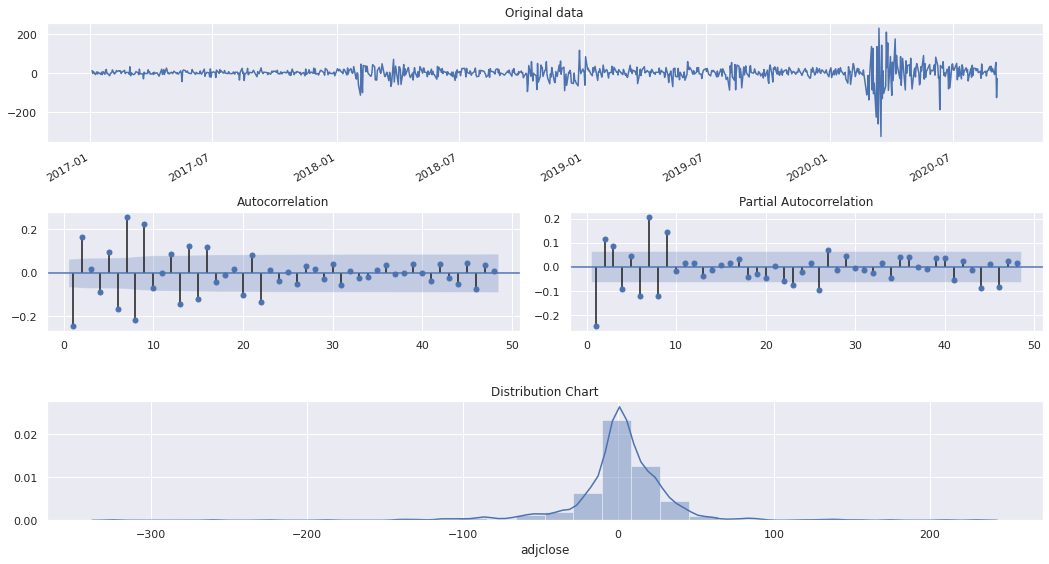

In [ ]:
check_stationarity(data.diff(1).dropna())

In [ ]:
p=8
d=1
q=2

In [ ]:
split=int(len(data)*0.8)
train_set=data[:split]
test_set=data[split:]
print(train_set.shape)
print(test_set.shape)

(740,)
(186,)


In [ ]:
# prepare data
X = train_set
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(p,d,q))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2886.086, Expected=2811.870
>Predicted=2814.782, Expected=2834.410
>Predicted=2838.094, Expected=2850.960
>Predicted=2845.568, Expected=2876.320
>Predicted=2882.525, Expected=2859.530
>Predicted=2862.177, Expected=2840.230
>Predicted=2848.045, Expected=2864.360
>Predicted=2860.475, Expected=2856.270
>Predicted=2864.700, Expected=2822.240
>Predicted=2822.491, Expected=2826.060
>Predicted=2834.856, Expected=2802.390
>Predicted=2796.194, Expected=2783.020
>Predicted=2790.972, Expected=2788.860
>Predicted=2788.902, Expected=2752.060
>Predicted=2753.877, Expected=2744.450
>Predicted=2747.244, Expected=2803.270
>Predicted=2805.336, Expected=2826.150
>Predicted=2821.976, Expected=2843.490
>Predicted=2852.435, Expected=2873.340
>Predicted=2875.252, Expected=2886.730
>Predicted=2887.033, Expected=2885.720
>Predicted=2890.074, Expected=2879.840
>Predicted=2883.418, Expected=2891.640
>Predicted=2888.991, Expected=2886.980
>Predicted=2886.460, Expected=2889.670
>Predicted=2889.340, Expe

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



>Predicted=2848.266, Expected=2881.770
>Predicted=2883.012, Expected=2883.980
>Predicted=2881.127, Expected=2938.090
>Predicted=2942.518, Expected=2918.650


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

invalid value encountered in true_divide



>Predicted=2923.339, Expected=2882.700
>Predicted=2886.968, Expected=2926.320
>Predicted=2922.142, Expected=2840.600
>Predicted=2846.508, Expected=2847.600
>Predicted=2850.408, Expected=2888.680
>Predicted=2890.415, Expected=2923.650
>Predicted=2919.340, Expected=2900.510
>Predicted=2908.779, Expected=2924.430
>Predicted=2931.264, Expected=2922.950
>Predicted=2912.297, Expected=2847.110
>Predicted=2859.359, Expected=2878.380
>Predicted=2880.397, Expected=2869.160
>Predicted=2869.304, Expected=2887.940
>Predicted=2889.232, Expected=2924.580
>Predicted=2932.214, Expected=2926.460
>Predicted=2925.125, Expected=2906.270
>Predicted=2905.722, Expected=2937.780
>Predicted=2943.569, Expected=2976.000
>Predicted=2966.628, Expected=2978.710
>Predicted=2986.962, Expected=2978.430
>Predicted=2980.988, Expected=2979.390
>Predicted=2979.084, Expected=3000.930
>Predicted=2996.911, Expected=3009.570
>Predicted=3013.409, Expected=3007.390
>Predicted=3009.278, Expected=2997.960
>Predicted=2998.759, Expe

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



>Predicted=3120.275, Expected=3108.460
>Predicted=3108.412, Expected=3103.540
>Predicted=3102.386, Expected=3110.290
>Predicted=3109.086, Expected=3133.640
>Predicted=3133.938, Expected=3140.520
>Predicted=3137.913, Expected=3153.630
>Predicted=3154.497, Expected=3140.980
>Predicted=3137.736, Expected=3113.870
>Predicted=3114.899, Expected=3093.200
>Predicted=3092.792, Expected=3112.760
>Predicted=3113.197, Expected=3117.430
>Predicted=3114.300, Expected=3145.910
>Predicted=3149.032, Expected=3135.960
>Predicted=3131.994, Expected=3132.520
RMSE: 23.850


RMSE: 23.850

### Grid search Arima

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.70)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
            continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
  return best_cfg

# evaluate parameters
p_values = range(0,2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
order=evaluate_models(train_set.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=265.994
ARIMA(0, 0, 1) RMSE=141.579
ARIMA(0, 1, 0) RMSE=25.308
ARIMA(0, 1, 1) RMSE=25.400
ARIMA(1, 0, 0) RMSE=25.357
ARIMA(1, 0, 1) RMSE=25.443
ARIMA(1, 1, 0) RMSE=25.383
ARIMA(1, 1, 1) RMSE=25.420
Best ARIMA(0, 1, 0) RMSE=25.308


In [ ]:
order=(8,1,2)
order

(8, 1, 2)

Review residual Errors on trainning set

RMSE: 24.014
                0
count  148.000000
mean     2.007491
std     24.011213
min    -83.280116
25%     -9.532572
50%      3.063247
75%     18.237603
max     58.043605


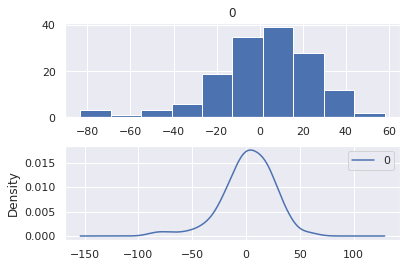

In [ ]:
# plot residual errors for ARIMA model
# prepare data
X = train_set.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order)
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
plt.figure()
plt.subplot(211)
residuals.hist(ax=pyplot.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

Final evaluate on test set

In [ ]:
split=int(len(data)*0.8)
train_set=data[:split]
test_set=data[split:]
print(train_set.shape)
print(test_set.shape)

(740,)
(186,)


>Predicted=3135.138, Expected=3141.630
>Predicted=3140.681, Expected=3168.570
>Predicted=3171.919, Expected=3168.800
>Predicted=3168.203, Expected=3191.450
>Predicted=3197.953, Expected=3192.520
>Predicted=3188.243, Expected=3191.140
>Predicted=3195.151, Expected=3205.370
>Predicted=3205.458, Expected=3221.220
>Predicted=3223.529, Expected=3224.010
>Predicted=3222.824, Expected=3223.380
>Predicted=3228.240, Expected=3239.910
>Predicted=3237.605, Expected=3240.020
>Predicted=3240.865, Expected=3221.290
>Predicted=3223.788, Expected=3230.780
>Predicted=3233.076, Expected=3257.850
>Predicted=3255.733, Expected=3234.850
>Predicted=3235.868, Expected=3246.280
>Predicted=3251.745, Expected=3237.180
>Predicted=3234.517, Expected=3253.050
>Predicted=3253.793, Expected=3274.700
>Predicted=3276.507, Expected=3265.350
>Predicted=3268.145, Expected=3288.130
>Predicted=3287.387, Expected=3283.150
>Predicted=3285.707, Expected=3289.290
>Predicted=3288.740, Expected=3316.810
>Predicted=3320.461, Expe

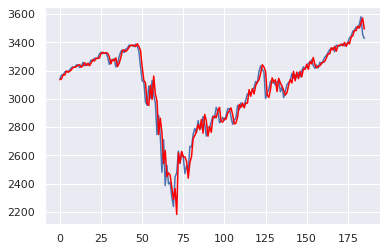

In [ ]:
X = train_set.values.astype('float32')
history = [x for x in X]

y = test_set.values.astype('float32')

# bias constant, could be calculated from in-sample mean residual
bias = residuals.mean()
predictions = list()

# rolling forecasts
for i in range(0, len(y)):
  # predict
  model = ARIMA(history, order)
  model_fit = model.fit(trend='nc', disp=0)
  yhat = bias + float(model_fit.forecast()[0])
  predictions.append(yhat)
  # observation
  obs = y[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
type(y)

numpy.ndarray

In [ ]:
len(y)

186

In [ ]:
type(predictions)

list

### Check win/loss

In [ ]:
buy=0
win=0
lose=0
revenue=[]
predictions=np.array(predictions)
for i in range(len(y)-1):
  if predictions[i+1] > y[i]:
    #print('buy')
    buy+=1
    result=y[i+1]-y[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(y))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 109
ratio buy/all test set: 0.5860215053763441
win num 69
lose num 40
revenue 841.9609375


In [ ]:
# daily returns
daily_rtn=[]
for i in range(len(y)-1):
  revenue = y[i] - predictions[i+1]
  daily_rtn.append(revenue)
daily_rtn=np.array(daily_rtn).flatten()
daily_rtn=pd.Series(daily_rtn)

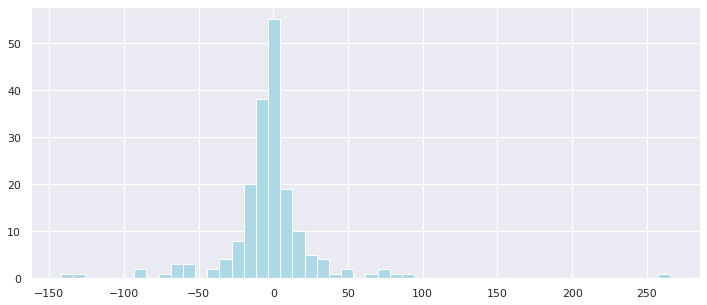

In [ ]:
daily_rtn.hist(bins=50, color='lightblue', figsize=(12,5))

In [ ]:
sum(daily_rtn)

-428.64074837868066

In [ ]:
def get_stats(s):
    n=len(s)
    s = s.dropna()
    revenue=sum(s)
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
          '\nTotal revenue:',revenue,\
          '\nWins:', wins,\
          '\nLosses:', losses,\
          '\nBreakeven:', evens,\
          '\nWin/Loss Ratio', win_r,\
          '\nMean Win:', mean_w,\
          '\nMean Loss:', mean_l,\
          '\nMean', mean_trd,\
          '\nStd Dev:', sd,\
          '\nMax Loss:', max_l,\
          '\nMax Win:', max_w,\
          '\nSharpe Ratio:', sharpe_r)

In [ ]:
get_stats(daily_rtn)

Trades: 185 
Total revenue: -428.64074837868066 
Wins: 76 
Losses: 109 
Breakeven: 0 
Win/Loss Ratio 0.697 
Mean Win: 18.986 
Mean Loss: -17.17 
Mean -2.317 
Std Dev: 34.146 
Max Loss: -142.054 
Max Win: 265.41 
Sharpe Ratio: -0.9229


## ARIMA Time series Apress

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series):
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(data)

Test Statistic                  -1.823705
p-value                          0.368758
No Lags Used                     9.000000
Number of Observations Used    916.000000
Critical Value (1%)             -3.437509
Critical Value (5%)             -2.864700
Critical Value (10%)            -2.568453
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
data[:3]

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
Name: adjclose, dtype: float64

In [ ]:
X = data
split=int(len(data)*0.8)
train, test = X[0:split], X[split:]
print(train.shape, test.shape)

(740,) (186,)


In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6668.113, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6669.419, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6669.338, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6668.254, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.570 seconds


In [ ]:
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3332.056
Date:                Sat, 05 Sep 2020   AIC                           6668.113
Time:                        12:59:06   BIC                           6677.324
Sample:                             0   HQIC                          6671.664
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1836      0.849      1.394      0.163      -0.480       2.847
sigma2       482.9278     14.331     33.699      0.000     454.840     511.015
Ljung-Box (Q):                       53.98   Jarque-

In [ ]:
stepwise_model.order

(0, 1, 0)

>Predicted=3132.557, Expected=3141.630
>Predicted=3141.339, Expected=3168.570
>Predicted=3167.530, Expected=3168.800
>Predicted=3168.314, Expected=3191.450
>Predicted=3190.500, Expected=3192.520
>Predicted=3192.076, Expected=3191.140
>Predicted=3190.993, Expected=3205.370
>Predicted=3204.840, Expected=3221.220
>Predicted=3220.486, Expected=3224.010
>Predicted=3223.619, Expected=3223.380
>Predicted=3223.240, Expected=3239.910
>Predicted=3239.318, Expected=3240.020
>Predicted=3239.781, Expected=3221.290
>Predicted=3221.801, Expected=3230.780
>Predicted=3230.676, Expected=3257.850
>Predicted=3256.918, Expected=3234.850
>Predicted=3235.249, Expected=3246.280
>Predicted=3246.043, Expected=3237.180
>Predicted=3237.406, Expected=3253.050
>Predicted=3252.577, Expected=3274.700
>Predicted=3273.768, Expected=3265.350
>Predicted=3265.306, Expected=3288.130
>Predicted=3287.315, Expected=3283.150
>Predicted=3283.019, Expected=3289.290
>Predicted=3289.024, Expected=3316.810
>Predicted=3315.746, Expe

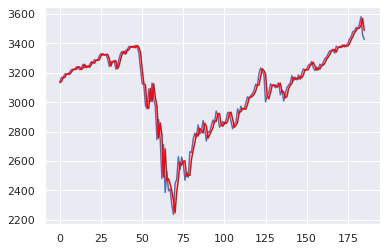

In [ ]:
X = train_set.values.astype('float32')
history = [x for x in X]

y = test_set.values.astype('float32')

# bias constant, could be calculated from in-sample mean residual
#bias = residuals.mean()
predictions = list()

# rolling forecasts
for i in range(0, len(y)):
  # predict
  model = ARIMA(history, (1,1,1))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = float(model_fit.forecast()[0])
  predictions.append(yhat)
  # observation
  obs = y[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

## FB Prophet

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

from fbprophet import Prophet

In [ ]:
df=pd.DataFrame(data).reset_index()
df

,index,adjclose
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902
...,...,...
921,2020-08-31,3500.310059
922,2020-09-01,3526.649902
923,2020-09-02,3580.840088
924,2020-09-03,3455.060059


In [ ]:
df = df.rename(columns={'index': 'ds', 'adjclose': 'y'})

In [ ]:
# split train and test set
split=int(len(df) * 0.80)
train_set=df[:split]
test_set=df[split:]
#define predict future (test_set)
predict_future=len(test_set)

In [ ]:
model = Prophet()
model.fit(train_set) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = predict_future, freq = 'D',
                                     include_history=False)  

In [ ]:
# now lets make the forecasts
forecast = model.predict(future)

In [ ]:
rmse = sqrt(mean_squared_error(test_set.y, forecast.yhat))
print('RMSE: %.3f' % rmse)

RMSE: 339.887


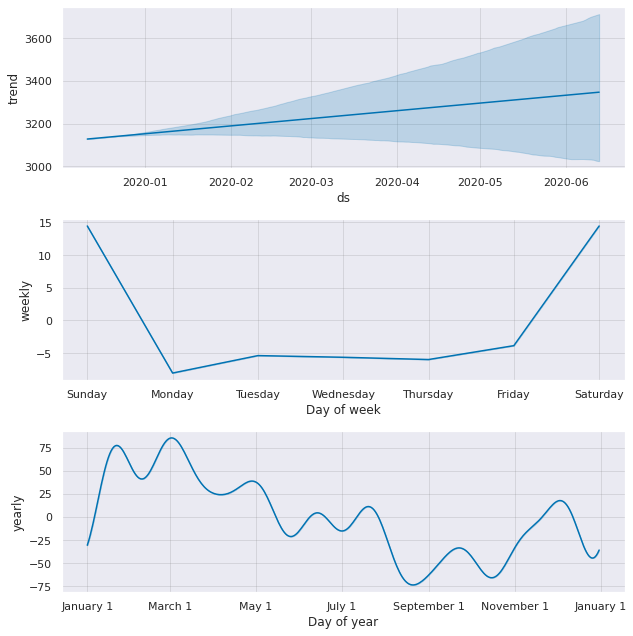

In [ ]:
fig2 = model.plot_components(forecast)

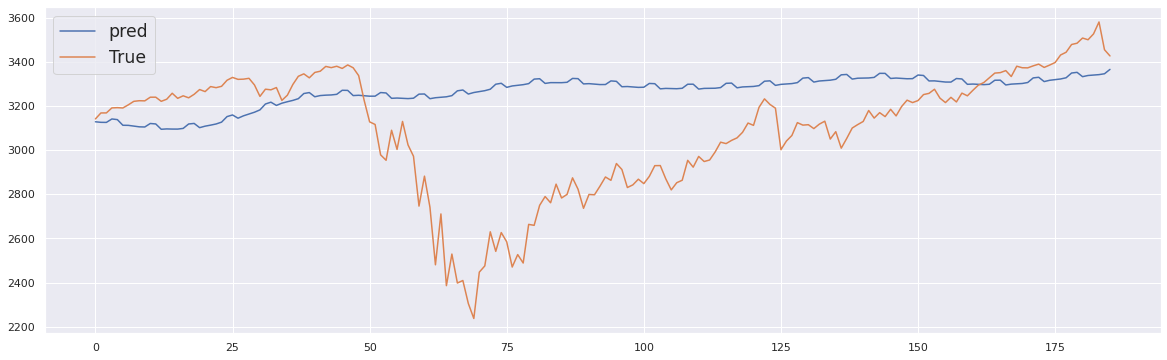

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(forecast.yhat,label='pred')
plt.plot(test_set.y.reset_index(drop=True),label='True')
plt.legend(fontsize='x-large')
plt.show()

FB Prophet dynamic predict

In [ ]:
X = train_set
history = X
y = test_set

In [ ]:
history

,ds,y
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902
...,...,...
735,2019-12-04,3112.760010
736,2019-12-05,3117.429932
737,2019-12-06,3145.909912
738,2019-12-09,3135.959961


In [ ]:
y.iloc[0]

ds    2019-12-11 00:00:00
y                 3141.63
Name: 740, dtype: object

In [ ]:
history.append(y.iloc[0])

,ds,y
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902
...,...,...
736,2019-12-05,3117.429932
737,2019-12-06,3145.909912
738,2019-12-09,3135.959961
739,2019-12-10,3132.520020


In [ ]:
y.iloc[0].values[1]

3141.6298828125

In [ ]:
X = train_set
history = X
y = test_set

# bias constant, could be calculated from in-sample mean residual
#bias = residuals.mean()
predictions = list()

# rolling forecasts
for i in range(0, len(y)):
  # predict
  model = Prophet()
  model.fit(history) 
  #print(history)
  # predict for five months in the furure and MS - month start is the frequency
  predict_future=1
  future = model.make_future_dataframe(periods = predict_future, freq = 'D',
                                     include_history=False)  
  #print(future)
  y_predict = model.predict(future).yhat
  predictions.append(y_predict)
  # observation
  obs = y.iloc[i]
  history=history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (y_predict, obs.values[1]))

In [ ]:
y.y

In [ ]:
np.array(predictions)

RMSE: 212.622


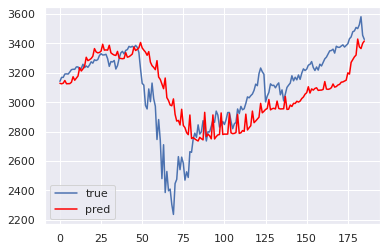

In [ ]:
# report performance
rmse = sqrt(mean_squared_error(y.y.values, np.array(predictions)))
#rmse = sqrt(mean_squared_error(test_set.y, forecast.yhat))
print('RMSE: %.3f' % rmse)
plt.plot(y.y.values,label='true')
plt.plot(np.array(predictions), color='red',label='pred')
plt.legend()
plt.show()

## LSTM (many to one)

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import matplotlib.pyplot as plt
from keras import optimizers
from keras import backend
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,Bidirectional
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy
from keras.utils.vis_utils import plot_model

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

### n_steps_in = 7

In [ ]:
df=data.copy()
split_number=0.80
n_steps_in  = 7
n_steps_out = 1
n_features=1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)
X_train, y_train = split_sequence(training_set, n_steps_in, n_steps_out)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)
print(y_train.shape)
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X_test, y_test = split_sequence(inputs, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X_test.shape)
print(y_test.shape)

(733, 7, 1)
(733, 1)
(186, 7, 1)
(186, 1)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


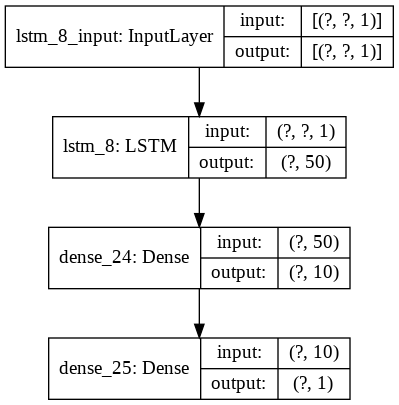

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, 1))) # 7 timesteps, 1 feature
model.add(Dense(10))
model.add(Dense(1)) # one timestep
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    #callbacks=callbacks
                    )
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Epoch 1/300
19/19 [==============================] - 0s 13ms/step - loss: 2136651.0000 - val_loss: 909217.8750
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 208841.0469 - val_loss: 48811.4961
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 16901.3984 - val_loss: 2701.5234
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 2248.2744 - val_loss: 1660.4890
Epoch 5/300
19/19 [==============================] - 0s 5ms/step - loss: 1746.8337 - val_loss: 1662.6416
Epoch 6/300
19/19 [==============================] - 0s 5ms/step - loss: 1678.0452 - val_loss: 1601.0961
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 1681.9962 - val_loss: 1600.6051
Epoch 8/300
19/19 [==============================] - 0s 4ms/step - loss: 1658.7330 - val_loss: 1631.3844
Epoch 9/300
19/19 [==============================] - 0s 5ms/step - loss: 1675.9916 - val_loss: 1614.6525
Epoch 10/300
19/19 [=========================

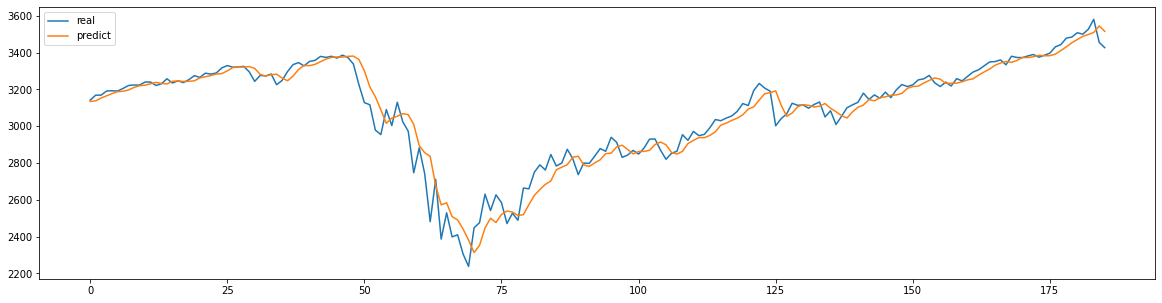

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

### Check win/loss

In [ ]:
df_final=pd.DataFrame(y_test.flatten(),y_test_pred.flatten()).reset_index()
df_final.columns=['true','predict']
df_final

,true,predict
0,3134.743896,3141.629883
1,3137.529297,3168.570068
2,3153.275635,3168.800049
3,3165.326904,3191.449951
4,3177.211426,3192.520020
...,...,...
181,3488.557617,3500.310059
182,3498.196777,3526.649902
183,3509.764404,3580.840088
184,3544.646484,3455.060059


In [ ]:
# Strategy: if predict[1] > true [0]--> buy
# result: true[1] - true [0]

In [ ]:
buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict[i+1] > df_final.true[i]:
    #print('buy')
    buy+=1
    result=df_final.true[i+1]-df_final.true[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 125
ratio buy/all test set: 0.6720430107526881
win num 107
lose num 18
revenue 1659.217041015625


Use call backs

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, 1))) # 7 timesteps, 1 feature
model.add(Dense(10))
model.add(Dense(1)) # one timestep
model.compile(optimizer='adam', loss='mse')

callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    callbacks=callbacks
                    )
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Epoch 1/300
19/19 [==============================] - 0s 14ms/step - loss: 6418271.0000 - val_loss: 5886998.0000
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 3085661.0000 - val_loss: 1811062.2500
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 449956.4688 - val_loss: 155590.2812
Epoch 4/300
19/19 [==============================] - 0s 5ms/step - loss: 61921.6250 - val_loss: 16719.8477
Epoch 5/300
19/19 [==============================] - 0s 5ms/step - loss: 8236.7832 - val_loss: 2807.2856
Epoch 6/300
19/19 [==============================] - 0s 4ms/step - loss: 2430.5054 - val_loss: 1522.7477
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 2411.1609 - val_loss: 1368.2897
Epoch 8/300
19/19 [==============================] - 0s 4ms/step - loss: 1821.6693 - val_loss: 1499.3301
Epoch 9/300
19/19 [==============================] - 0s 5ms/step - loss: 1359.9108 - val_loss: 1440.9987
Epoch 10/300
19/19 [================

In [ ]:
df_final=pd.DataFrame(y_test.flatten(),y_test_pred.flatten()).reset_index()
df_final.columns=['true','predict']

buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict[i+1] > df_final.true[i]:
    #print('buy')
    buy+=1
    result=df_final.true[i+1]-df_final.true[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 128
ratio buy/all test set: 0.6881720430107527
win num 108
lose num 20
revenue 2286.885009765625


### n_steps_in  = 14

In [ ]:
df=data.copy()
split_number=0.80
n_steps_in  = 14
n_steps_out = 1
n_features=1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)
X_train, y_train = split_sequence(training_set, n_steps_in, n_steps_out)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)
print(y_train.shape)
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X_test, y_test = split_sequence(inputs, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X_test.shape)
print(y_test.shape)

(726, 14, 1)
(726, 1)
(186, 14, 1)
(186, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, 1))) # 7 timesteps, 1 feature
model.add(Dense(10))
model.add(Dense(1)) # one timestep
model.compile(optimizer='adam', loss='mse')

callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    callbacks=callbacks
                    )
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Epoch 1/300
19/19 [==============================] - 0s 15ms/step - loss: 14442341.0000 - val_loss: 17842282.0000
Epoch 2/300
19/19 [==============================] - 0s 6ms/step - loss: 9381207.0000 - val_loss: 3683460.0000
Epoch 3/300
19/19 [==============================] - 0s 7ms/step - loss: 2039799.1250 - val_loss: 1499272.5000
Epoch 4/300
19/19 [==============================] - 0s 7ms/step - loss: 695830.8750 - val_loss: 411587.4375
Epoch 5/300
19/19 [==============================] - 0s 7ms/step - loss: 174559.4688 - val_loss: 77175.1250
Epoch 6/300
19/19 [==============================] - 0s 7ms/step - loss: 26034.2988 - val_loss: 7639.6626
Epoch 7/300
19/19 [==============================] - 0s 6ms/step - loss: 2312.9895 - val_loss: 1648.4537
Epoch 8/300
19/19 [==============================] - 0s 7ms/step - loss: 1132.6898 - val_loss: 1367.1428
Epoch 9/300
19/19 [==============================] - 0s 7ms/step - loss: 981.8498 - val_loss: 1358.7135
Epoch 10/300
19/19 [=======

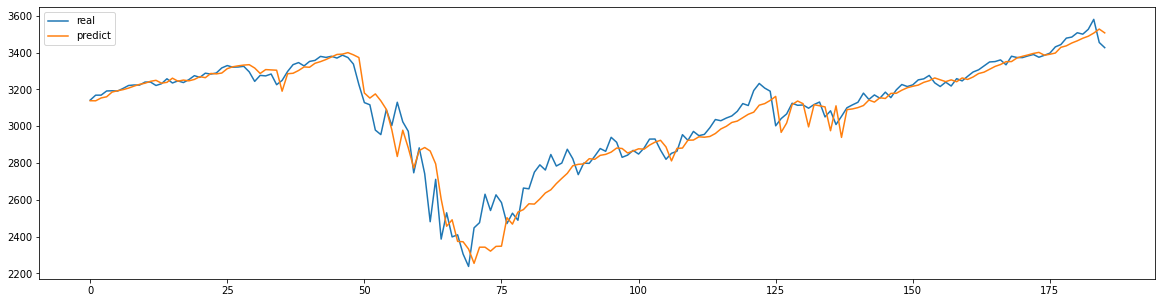

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

In [ ]:
df_final=pd.DataFrame(y_test.flatten(),y_test_pred.flatten()).reset_index()
df_final.columns=['true','predict']

buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict[i+1] > df_final.true[i]:
    #print('buy')
    buy+=1
    result=df_final.true[i+1]-df_final.true[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 125
ratio buy/all test set: 0.6720430107526881
win num 107
lose num 18
revenue 2335.399658203125


## GRU

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']

In [ ]:
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
df=data.copy()
split_number=0.80
n_steps_in  = 7
n_steps_out = 1
n_features=1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)
X_train, y_train = split_sequence(training_set, n_steps_in, n_steps_out)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)
print(y_train.shape)
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X_test, y_test = split_sequence(inputs, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X_test.shape)
print(y_test.shape)

(733, 7, 1)
(733, 1)
(186, 7, 1)
(186, 1)


In [ ]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
model_GRU.add(GRU(units=50, activation='tanh'))
model_GRU.add(Dense(10))
model_GRU.add(Dense(1))
# Compiling the RNN
model_GRU.compile(optimizer='adam', loss='mse')
model_GRU.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 7, 50)             7950      
_________________________________________________________________
gru_7 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 23,771
Trainable params: 23,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model_GRU.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    callbacks=callbacks
                    )


train rmse: 225.9874630260996
test rmse: 535.3844666940472


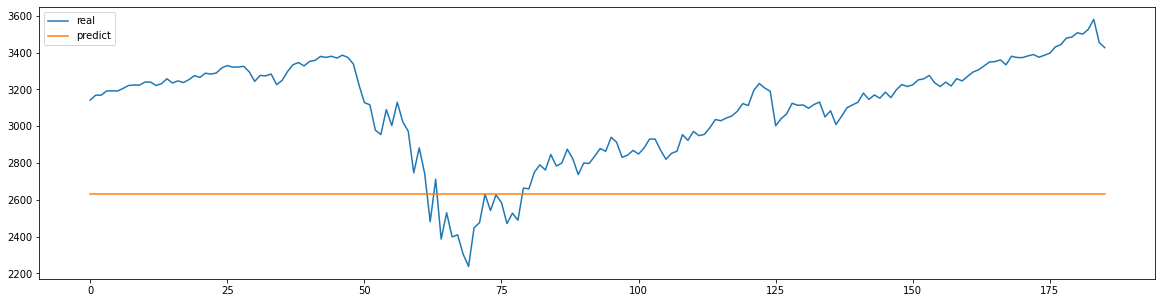

In [ ]:
y_train_pred=model_GRU.predict(X_train)
y_test_pred=model_GRU.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

In [ ]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(units=50, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu'))
model_GRU.add(Dense(10))
model_GRU.add(Dense(1))
# Compiling the RNN
model_GRU.compile(optimizer='adam', loss='mse')
model_GRU.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 50)                7950      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 8,471
Trainable params: 8,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model_GRU.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    #callbacks=callbacks
                    )


Epoch 1/300
19/19 [==============================] - 0s 14ms/step - loss: 5971126.0000 - val_loss: 6030122.5000
Epoch 2/300
19/19 [==============================] - 0s 5ms/step - loss: 3868605.2500 - val_loss: 3605384.5000
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 2040387.8750 - val_loss: 1467445.3750
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 613595.0000 - val_loss: 180043.1094
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 21455.5098 - val_loss: 19659.9668
Epoch 6/300
19/19 [==============================] - 0s 5ms/step - loss: 5766.1567 - val_loss: 1398.0685
Epoch 7/300
19/19 [==============================] - 0s 5ms/step - loss: 1445.2568 - val_loss: 937.1590
Epoch 8/300
19/19 [==============================] - 0s 5ms/step - loss: 871.1828 - val_loss: 827.3801
Epoch 9/300
19/19 [==============================] - 0s 5ms/step - loss: 845.3076 - val_loss: 816.6186
Epoch 10/300
19/19 [===============

train rmse: 25.885879573086672
test rmse: 72.83285173671887


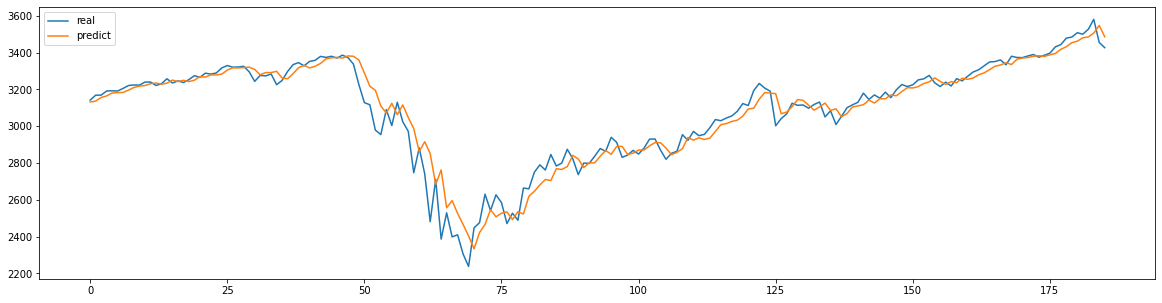

In [ ]:
y_train_pred=model_GRU.predict(X_train)
y_test_pred=model_GRU.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

In [ ]:
def profit(true,predict):
  buy=0
  win=0
  lose=0
  revenue=[]
  for i in range(len(predict)-1):
    if predict.values[i+1] > true.values[i]:
      buy+=1
      result=true.values[i+1]-true.values[i]
      revenue.append(result)
      if result >0:
        win+=1
      else:
        lose+=1
  print('total buy',buy)      
  print('ratio buy/all test set:',buy/len(predict))      
  print('win num',win)
  print('lose num',lose)
  print('revenue',sum(revenue))

In [ ]:
profit(pd.Series(y_test.flatten()),pd.Series(y_test_pred.flatten()))

total buy 73
ratio buy/all test set: 0.3924731182795699
win num 44
lose num 29
revenue 91.39013671875


## CNN

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import RepeatVector,TimeDistributed # For LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
!pip install yahoo_fin
!pip install requests_html

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
# Define important value
split=int(len(data) * 0.80)
training_set=data[:split].values.reshape(-1,1) # y train
test_set=data[split:].values.reshape(-1,1) #reshape -1: lay het len
print(training_set.shape)
print(test_set.shape)

(740, 1)
(186, 1)


In [ ]:
n_steps = 10
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(730, 10)
(730,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(730, 10, 1)


In [ ]:
#Perapare test set
inputs = data[len(data)-len(test_set) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(data.shape)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test=test_set # y test
print(X_test.shape)
print(y_test.shape)

(926,)
(186, 1)
(196, 1)
(186, 10, 1)
(186, 1)


In [ ]:
# define model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dense(1))
model_CNN.compile(optimizer='adam', loss='mse')
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 9, 64)             192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 13,093
Trainable params: 13,093
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=5, 
                           mode='min',restore_best_weights=True),]

model_CNN.fit(X_train,y_train,epochs=300,#batch_size=32,
              verbose=1,
              validation_split=0.2,
              callbacks=callbacks
              )

Epoch 1/300
19/19 [==============================] - 0s 6ms/step - loss: 0.3140 - val_loss: 0.0409
Epoch 2/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0467 - val_loss: 0.0602
Epoch 3/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.0711
Epoch 4/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0726
Epoch 5/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0644
Epoch 6/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.0280
Epoch 7/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0243 - val_loss: 0.0320
Epoch 8/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0255
Epoch 9/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0324
Epoch 10/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0447
Epoch 11/

In [ ]:
y_train_pred=sc.inverse_transform(model_CNN.predict(X_train))
y_test_pred=sc.inverse_transform(model_CNN.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 2709.1672534097447
test rmse: 85.54152257748927


In [ ]:
df_final=pd.DataFrame(y_test.flatten(),y_test_pred.flatten()).reset_index()
df_final.columns=['true','predict']
df_final

,true,predict
0,3129.598145,3141.629883
1,3127.141113,3168.570068
2,3129.047852,3168.800049
3,3151.244629,3191.449951
4,3160.856934,3192.520020
...,...,...
181,3464.234863,3500.310059
182,3481.346191,3526.649902
183,3487.351562,3580.840088
184,3497.637939,3455.060059


In [ ]:
buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict[i+1] > df_final.true[i]:
    #print('buy')
    buy+=1
    result=df_final.true[i+1]-df_final.true[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 130
ratio buy/all test set: 0.6989247311827957
win num 105
lose num 25
revenue 1565.117431640625


n_step 60: rmse 150, revenue 1165

n_step 30: rmse 97, revenue 1625

n_step 10: rmse 85, revenue 1565

## CNN-LSTM (sample, subsequences, timesteps,features)

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']
data

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [ ]:
# Define important value
split=int(len(data) * 0.8)
column=1
n_steps = 60
training_set=data[:split].values.reshape(-1,1) # y train
test_set=data[split:].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(740, 1)
(186, 1)


In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(680, 60)
(680,)


In [ ]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
subsequences=2
timesteps=int(X_train.shape[1]/subsequences)
X_train = X_train.reshape((X_train.shape[0],subsequences,timesteps, 1))
print(X_train.shape)

(680, 2, 30, 1)


In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = data[len(data)-len(y_test) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(data.shape)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],subsequences,timesteps, 1))
print(X_test.shape)


(926,)
(186, 1)
(246, 1)
(186, 2, 30, 1)


In [ ]:
# define model
model_CNN_LSTM = Sequential()
model_CNN_LSTM.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train.shape[2], X_train.shape[3])))
model_CNN_LSTM.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_CNN_LSTM.add(TimeDistributed(Flatten()))
model_CNN_LSTM.add(LSTM(50, activation='relu'))
model_CNN_LSTM.add(Dense(10))
model_CNN_LSTM.add(Dense(1))
model_CNN_LSTM.compile(optimizer='adam', loss='mse')
model_CNN_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 30, 64)      128       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 15, 64)      0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 960)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                202200    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 202,849
Trainable params: 202,849
Non-trainable params: 0
________________________________________________

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=5, 
                           mode='min',restore_best_weights=True),
            ]

model_CNN_LSTM.fit(X_train,y_train,epochs=200,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Epoch 1/200
17/17 [==============================] - 0s 20ms/step - loss: 0.1741 - val_loss: 0.1235
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0572 - val_loss: 0.1498
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0390 - val_loss: 0.1090
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.0461
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0513
Epoch 6/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0269 - val_loss: 0.1701
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0217 - val_loss: 0.0963
Epoch 8/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0193 - val_loss: 0.0650
Epoch 9/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0195 - val_loss: 0.0829


In [ ]:
y_train_pred=sc.inverse_transform(model_CNN_LSTM.predict(X_train))
y_test_pred=sc.inverse_transform(model_CNN_LSTM.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 2727.4109372910452
test rmse: 186.3346500697422


In [ ]:
df_final=pd.DataFrame(y_test.flatten(),y_test_pred.flatten()).reset_index()
df_final.columns=['true','predict']
df_final

,true,predict
0,3108.829102,3141.629883
1,3111.070068,3168.570068
2,3125.670410,3168.800049
3,3126.651367,3191.449951
4,3152.815186,3192.520020
...,...,...
181,3541.267334,3500.310059
182,3554.134521,3526.649902
183,3596.650879,3580.840088
184,3650.012939,3455.060059


In [ ]:
buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict[i+1] > df_final.true[i]:
    #print('buy')
    buy+=1
    result=df_final.true[i+1]-df_final.true[i]
    revenue.append(result)
    if result >0:
      #print('win')
      win+=1
    else:
      #print('lose')
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 116
ratio buy/all test set: 0.6236559139784946
win num 92
lose num 24
revenue 1270.4052734375


## Base model

In [ ]:
df_final=pd.DataFrame(y_test.flatten())
df_final.columns=['true']
df_final['predict']=df_final['true'].shift(1)
df_final.dropna(inplace=True)
df_final

,true,predict
1,3168.570068,3141.629883
2,3168.800049,3168.570068
3,3191.449951,3168.800049
4,3192.520020,3191.449951
5,3191.139893,3192.520020
...,...,...
181,3500.310059,3508.010010
182,3526.649902,3500.310059
183,3580.840088,3526.649902
184,3455.060059,3580.840088


In [ ]:
print('test rmse:', np.sqrt(mean_squared_error(df_final.true, df_final.predict)))

test rmse: 66.77444782606906


In [ ]:
df_final.predict.values[2]

3168.800048828125

In [ ]:
buy=0
win=0
lose=0
revenue=[]
for i in range(len(df_final)-1):
  if df_final.predict.values[i+1] > df_final.true.values[i]:
    buy+=1
    result=df_final.true.values[i+1]-df_final.true.values[i]
    revenue.append(result)
    if result >0:
      win+=1
    else:
      lose+=1
print('total buy',buy)      
print('ratio buy/all test set:',buy/len(df_final))      
print('win num',win)
print('lose num',lose)
print('revenue',sum(revenue))

total buy 0
ratio buy/all test set: 0.0
win num 0
lose num 0
revenue 0


## Simple exponential smoothing (apress)

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
!pip install yahoo_fin

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']
# Define important value
split=int(len(data) * 0.80)
train=data[:split].values.reshape(-1,1) # y train
test=data[split:].values.reshape(-1,1) #reshape -1: lay het len
print(train.shape)
print(test.shape)

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.
(740, 1)
(186, 1)


In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
df3 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(len(test))
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 232791.41784089504
MAE is : 435.64483880640034
RMSE is : 482.4846296421214
MAPE is : 13.678906074756558
R2 is : -2.0852515364215836

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 76036.82522242326
MAE is : 216.70527967718454
RMSE is : 275.7477565138532
MAPE is : 7.435266376361464
R2 is : -0.0077378883547885025

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 76792.6572481678
MAE is : 215.08774446230177
RMSE is : 277.11488095764145
MAPE is : 7.41301117876561
R2 is : -0.017755147325644316

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 77010.13962771188
MAE is : 214.7974021991399
RMSE is : 277.50700824972307
MAPE is : 7.410504191413963
R2 is : -0.020637503779573407

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 77152.24983601896
MAE is : 214.66206844272676
RMSE is : 277.76293819733934
MAPE is : 7.410350385430522
R2 is : -0.022520

,RMSE,smoothing parameter
1,275.747757,0.1
2,277.114881,0.2
3,277.507008,0.3


### Explain

In [ ]:
i=0.5
print(f'Fitting for smoothing level= {i}')
fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
fit_v

Fitting for smoothing level= 0.5


In [ ]:
fcst_pred_v= fit_v.forecast(len(test))
print(len(fcst_pred_v))
fcst_pred_v[:5]

186


array([3132.80431356, 3132.80431356, 3132.80431356, 3132.80431356,
       3132.80431356])

In [ ]:
timeseries_evaluation_metrics_func(test,fcst_pred_v)

Evaluation metric results:-
MSE is : 77256.21025228496
MAE is : 214.58192280425644
RMSE is : 277.95001394546637
MAPE is : 7.410730706403573
R2 is : -0.023898748457636287



In [ ]:
resu = []
temp_df = pd.DataFrame()
df3 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])

rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
df3 = {'smoothing parameter':i, 'RMSE': rmse}
temp_df = temp_df.append(df3, ignore_index=True)
temp_df

,RMSE,smoothing parameter
0,277.950014,0.5


### END

In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(len(test))
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 76036.82522242326
MAE is : 216.70527967718454
RMSE is : 275.7477565138532
MAPE is : 7.435266376361464
R2 is : -0.0077378883547885025



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(len(test))
timeseries_evaluation_metrics_func(test,fcst_auto_pred)


Evaluation metric results:-
MSE is : 77241.78235680172
MAE is : 214.59290494109126
RMSE is : 277.9240586145822
MAPE is : 7.41067859206464
R2 is : -0.023707531413984517



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,740
Model:,SimpleExpSmoothing,SSE,357613.513
Optimized:,True,AIC,4577.613
Trend:,None,BIC,4586.826
Seasonal:,None,AICC,4577.667
Seasonal Periods:,None,Date:,"Sun, 06 Sep 2020"
Box-Cox:,False,Time:,03:33:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9693212,alpha,True
initial_level,2258.2280,l.0,True


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
train=pd.Series(train.flatten())
test=pd.Series(test.flatten())
train.index=data[:split].index
test.index=data[split:].index
df_fcst_gs_pred.index = data[split:].index
df_fcst_auto_pred.index = data[split:].index

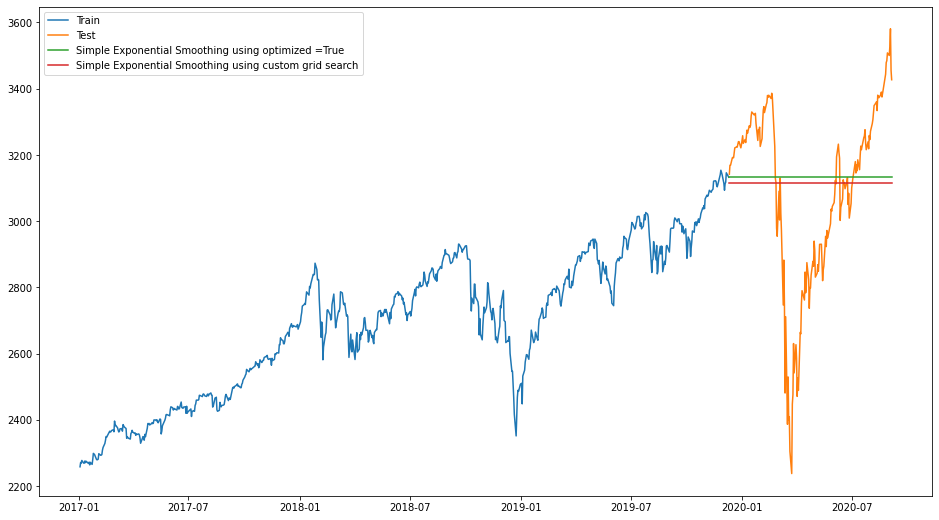

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

In [ ]:
test

2019-12-11    3141.629883
2019-12-12    3168.570068
2019-12-13    3168.800049
2019-12-16    3191.449951
2019-12-17    3192.520020
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Length: 186, dtype: float64

In [ ]:
df_fcst_auto_pred

,Close_auto_search
2019-12-11,3132.63409
2019-12-12,3132.63409
2019-12-13,3132.63409
2019-12-16,3132.63409
2019-12-17,3132.63409
...,...
2020-08-31,3132.63409
2020-09-01,3132.63409
2020-09-02,3132.63409
2020-09-03,3132.63409


### Define profit function

In [ ]:
def profit(true,predict):
  buy=0
  win=0
  lose=0
  revenue=[]
  for i in range(len(predict)-1):
    if predict.values[i+1] > true.values[i]:
      buy+=1
      result=true.values[i+1]-true.values[i]
      revenue.append(result)
      if result >0:
        win+=1
      else:
        lose+=1
  print('total buy',buy)      
  print('ratio buy/all test set:',buy/len(predict))      
  print('win num',win)
  print('lose num',lose)
  print('revenue',sum(revenue))

In [ ]:
profit(test,df_fcst_auto_pred.Close_auto_search)

total buy 87
ratio buy/all test set: 0.46774193548387094
win num 50
lose num 37
revenue 243.33984375


## Triple Exponential Smoothing (Apress)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']
# Define important value
split=int(len(data) * 0.80)
train=data[:split]
test=data[split:]
print(train.shape)
print(test.shape)

(740, 1)
(186, 1)


In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(len(test))
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Starting Grid Search..


KeyboardInterrupt: ignored

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

In [ ]:
df_results_moni.info()

In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).\
fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.6,
    use_boxcox=False,use_basinhopping = True,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(len(test))
print(fit1.summary())

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

In [ ]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
print(fitESAUTO.summary())

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(len(test))
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

In [ ]:
fitESAUTOpred = pd.DataFrame(fitESAUTOpred)
Forecast_custom_pred = pd.DataFrame(Forecast_custom_pred)
train=pd.Series(train.flatten())
test=pd.Series(test.flatten())
train.index=data[:split].index
test.index=data[split:].index
df_fcst_gs_pred.index = data[split:].index
df_fcst_auto_pred.index = data[split:].index

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

In [ ]:
profit(test,Forecast_custom_pred)

## Bidirectional LSTM Univarient  Single Step Style (Apress)

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import  Dropout, GRU, Bidirectional
from keras.layers import RepeatVector,TimeDistributed # For LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

import tensorflow as tf
from sklearn import preprocessing
tf.random.set_seed(123)
np.random.seed(123)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
data=df['adjclose']

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
df=data.copy()
split_number=0.80
n_steps_in  = 7
n_steps_out = 1
n_features=1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)
X_train, y_train = split_sequence(training_set, n_steps_in, n_steps_out)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)
print(y_train.shape)
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X_test, y_test = split_sequence(inputs, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X_test.shape)
print(y_test.shape)

(733, 7, 1)
(733, 1)
(186, 7, 1)
(186, 1)


In [ ]:
model_Bi_LSTM = Sequential()
model_Bi_LSTM.add(Bidirectional(LSTM(units=50, return_sequences=True, activation='relu',
                                     input_shape=(X_train.shape[1], X_train.shape[2])))) # 60 timesteps, 1 feature
model_Bi_LSTM.add(Bidirectional(LSTM(units=50,activation='relu')))
model_Bi_LSTM.add(Dense(10,activation='relu'))
#model_Bi_LSTM.add(Dropout(0.2))
model_Bi_LSTM.add(Dense(1))
model_Bi_LSTM.compile(optimizer='adam', loss='mse')
#model_Bi_LSTM.summary()

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=10, 
                           mode='min',restore_best_weights=True)
            ]

model_Bi_LSTM.fit(X_train,y_train,epochs=200,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Epoch 1/200
19/19 [==============================] - 1s 41ms/step - loss: 6152996.5000 - val_loss: 5476125.0000
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 1797668.0000 - val_loss: 7155.7236
Epoch 3/200
19/19 [==============================] - 0s 14ms/step - loss: 22729.7012 - val_loss: 3077.1099
Epoch 4/200
19/19 [==============================] - 0s 14ms/step - loss: 2643.6201 - val_loss: 863.3022
Epoch 5/200
19/19 [==============================] - 0s 14ms/step - loss: 795.3271 - val_loss: 804.3683
Epoch 6/200
19/19 [==============================] - 0s 14ms/step - loss: 775.7332 - val_loss: 795.2521
Epoch 7/200
19/19 [==============================] - 0s 15ms/step - loss: 763.4315 - val_loss: 797.7164
Epoch 8/200
19/19 [==============================] - 0s 14ms/step - loss: 758.0507 - val_loss: 778.8581
Epoch 9/200
19/19 [==============================] - 0s 14ms/step - loss: 749.7137 - val_loss: 776.2793
Epoch 10/200
19/19 [===========================

In [ ]:
y_train_pred=model_Bi_LSTM.predict(X_train)
y_test_pred=model_Bi_LSTM.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 25.34789231067032
test rmse: 69.96478782106567


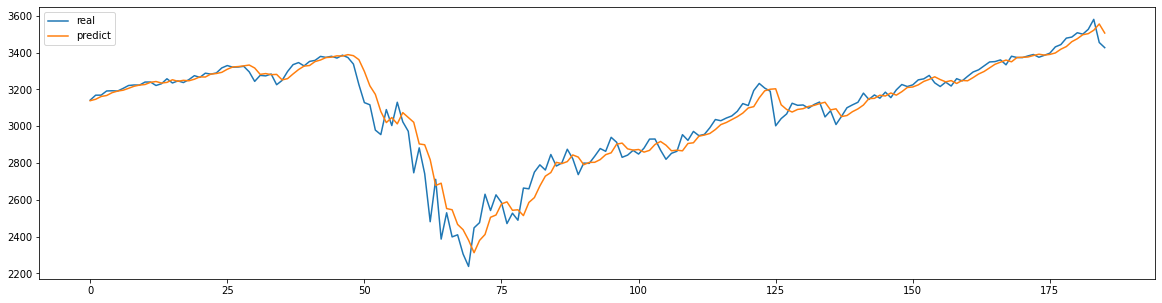

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

In [ ]:
def profit(true,predict):
  buy=0
  win=0
  lose=0
  revenue=[]
  for i in range(len(predict)-1):
    if predict.values[i+1] > true.values[i]:
      buy+=1
      result=true.values[i+1]-true.values[i]
      revenue.append(result)
      if result >0:
        win+=1
      else:
        lose+=1
  print('total buy',buy)      
  print('ratio buy/all test set:',buy/len(predict))      
  print('win num',win)
  print('lose num',lose)
  print('revenue',sum(revenue))

In [ ]:
profit(pd.Series(y_test.flatten()),pd.Series(y_test_pred.flatten()))

total buy 98
ratio buy/all test set: 0.5268817204301075
win num 65
lose num 33
revenue 516.970458984375


## LSTM one to many with repeat vector

In [ ]:
df=data.copy()
split_number=0.80
n_steps_in  = 7
n_steps_out = 1
n_features=1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)
X_train, y_train = split_sequence(training_set, n_steps_in, n_steps_out)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)
print(y_train.shape)
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X_test, y_test = split_sequence(inputs, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X_test.shape)
print(y_test.shape)

(733, 7, 1)
(733, 1)
(186, 7, 1)
(186, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(None,1),activation='relu'))
#model.add(Dense(10))
model.add(RepeatVector(n_steps_out)) #5 timesteps with 50 features
model.add(LSTM(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 50)                10400     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 1, 50)             0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 31,121
Trainable params: 31,121
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    callbacks=callbacks
                    )


Epoch 1/300
19/19 [==============================] - 0s 21ms/step - loss: 6795955.5000 - val_loss: 8339656.5000
Epoch 2/300
19/19 [==============================] - 0s 5ms/step - loss: 6229550.5000 - val_loss: 7162210.5000
Epoch 3/300
19/19 [==============================] - 0s 5ms/step - loss: 4709936.5000 - val_loss: 4095639.0000
Epoch 4/300
19/19 [==============================] - 0s 5ms/step - loss: 1736013.7500 - val_loss: 345060.8438
Epoch 5/300
19/19 [==============================] - 0s 5ms/step - loss: 68610.1328 - val_loss: 12669.5098
Epoch 6/300
19/19 [==============================] - 0s 5ms/step - loss: 19069.4082 - val_loss: 4434.3838
Epoch 7/300
19/19 [==============================] - 0s 6ms/step - loss: 2429.9644 - val_loss: 2267.1558
Epoch 8/300
19/19 [==============================] - 0s 6ms/step - loss: 1505.9032 - val_loss: 1390.0348
Epoch 9/300
19/19 [==============================] - 0s 6ms/step - loss: 1381.7496 - val_loss: 1359.1755
Epoch 10/300
19/19 [========

train rmse: 36.7146271223979
test rmse: 99.57031746621573


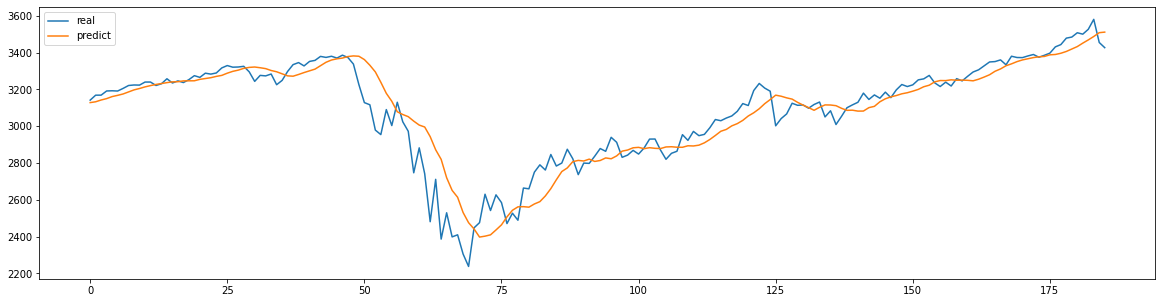

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()

In [ ]:
profit(pd.Series(y_test.flatten()),pd.Series(y_test_pred.flatten()))

total buy 69
ratio buy/all test set: 0.3709677419354839
win num 41
lose num 28
revenue 23.31005859375


## LSTM One to many with repeat vector and Time distribued

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 50)                10400     
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 1, 50)             0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 50)             2550      
_________________________________________________________________
lstm_39 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 51        
Total params: 53,401
Trainable params: 53,401
Non-trainable params: 0
_________________________________________________

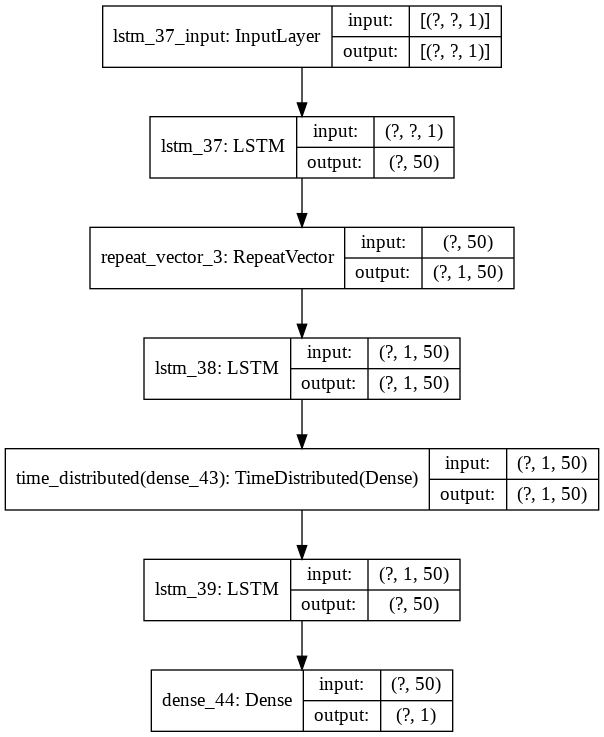

In [ ]:
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(None,1)))
#model.add(Dense(10))
model.add(RepeatVector(n_steps_out)) #5 timesteps with 50 features
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(TimeDistributed(Dense(50)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=5, #2 or 1 thoi
                           mode='min',restore_best_weights=True),]
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=1,
                    callbacks=callbacks
                    )


Epoch 1/300
19/19 [==============================] - 1s 27ms/step - loss: 5360956.0000 - val_loss: 4640573.5000
Epoch 2/300
19/19 [==============================] - 0s 6ms/step - loss: 1683584.3750 - val_loss: 6722.1006
Epoch 3/300
19/19 [==============================] - 0s 6ms/step - loss: 100392.6953 - val_loss: 2519.0156
Epoch 4/300
19/19 [==============================] - 0s 6ms/step - loss: 17490.8223 - val_loss: 1254.9893
Epoch 5/300
19/19 [==============================] - 0s 6ms/step - loss: 3409.9873 - val_loss: 1643.1406
Epoch 6/300
19/19 [==============================] - 0s 6ms/step - loss: 1608.1875 - val_loss: 1328.3252
Epoch 7/300
19/19 [==============================] - 0s 6ms/step - loss: 1349.3627 - val_loss: 1300.9500
Epoch 8/300
19/19 [==============================] - 0s 6ms/step - loss: 1276.4521 - val_loss: 1251.8298
Epoch 9/300
19/19 [==============================] - 0s 6ms/step - loss: 1275.7223 - val_loss: 1248.1342
Epoch 10/300
19/19 [======================

train rmse: 32.83939183283617
test rmse: 92.18034814407594


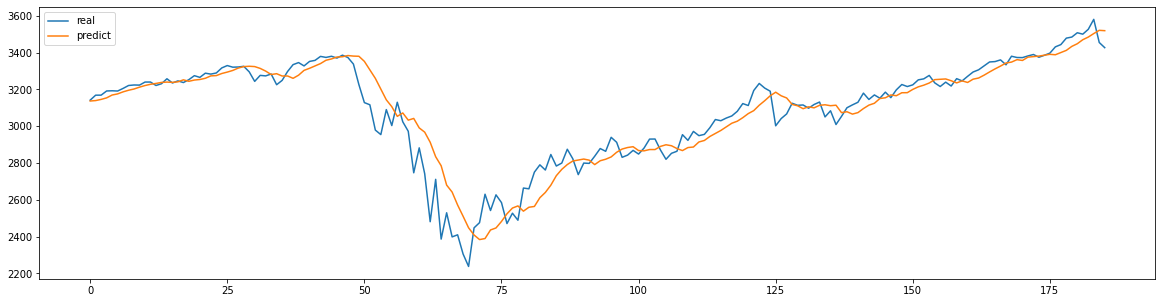

total buy 68
ratio buy/all test set: 0.3655913978494624
win num 41
lose num 27
revenue -23.750244140625


In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
plt.figure(figsize=(20,5))
plt.plot(y_test,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()
profit(pd.Series(y_test.flatten()),pd.Series(y_test_pred.flatten()))